In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import mne
import openpyxl as op
import matplotlib.cm as cm

# Supplementary Table 1

In [ ]:
magnesium = pd.read_excel(r"D:\주성\documents\2025\Mg comma\clinical features2.xlsx", sheet_name='Table2')
magnesium1 = magnesium.loc[magnesium['Mg Protocol Type']==1]
magnesium2 = magnesium.loc[magnesium['Mg Protocol Type']==2]
print(magnesium1.describe())
print(magnesium2.describe())

from scipy.stats import mannwhitneyu as mann
for col in ['Mg Starting Date', 'Mg Infusion Day', 'Loading Mg', 'Maintenance Mg', 'Total Mg', 'Max concentration']:
    s, p = mann(magnesium1[col], magnesium2[col])
    print(col, s, p)

# Figure 4

## 4분면으로 그리기

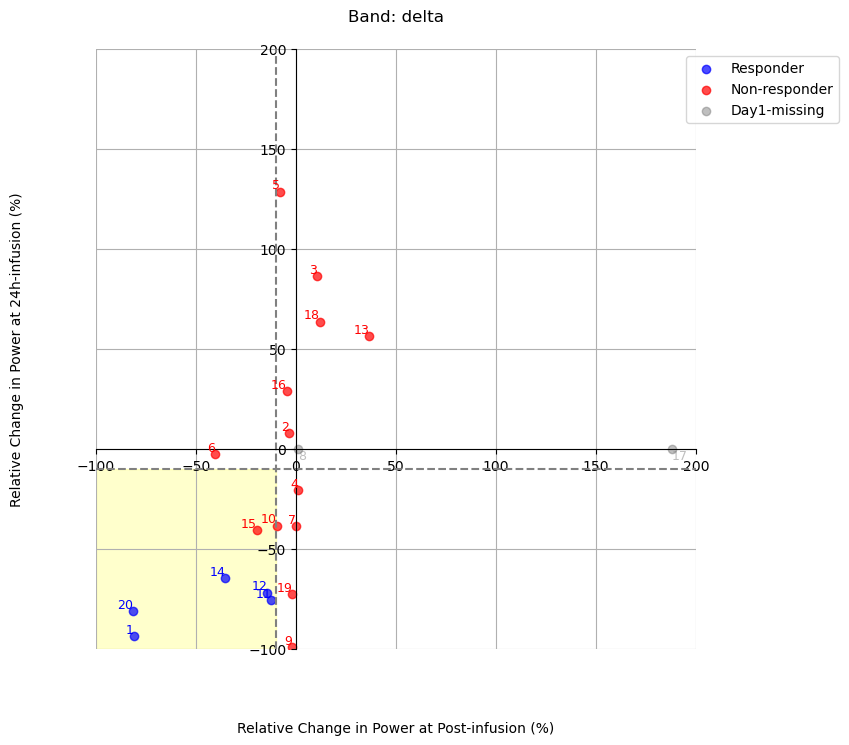

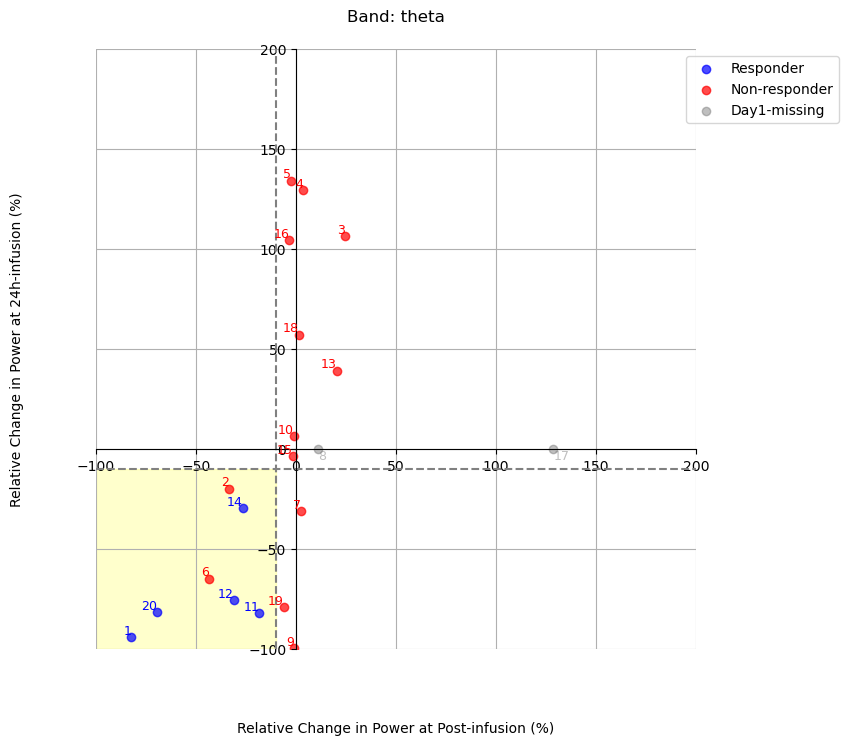

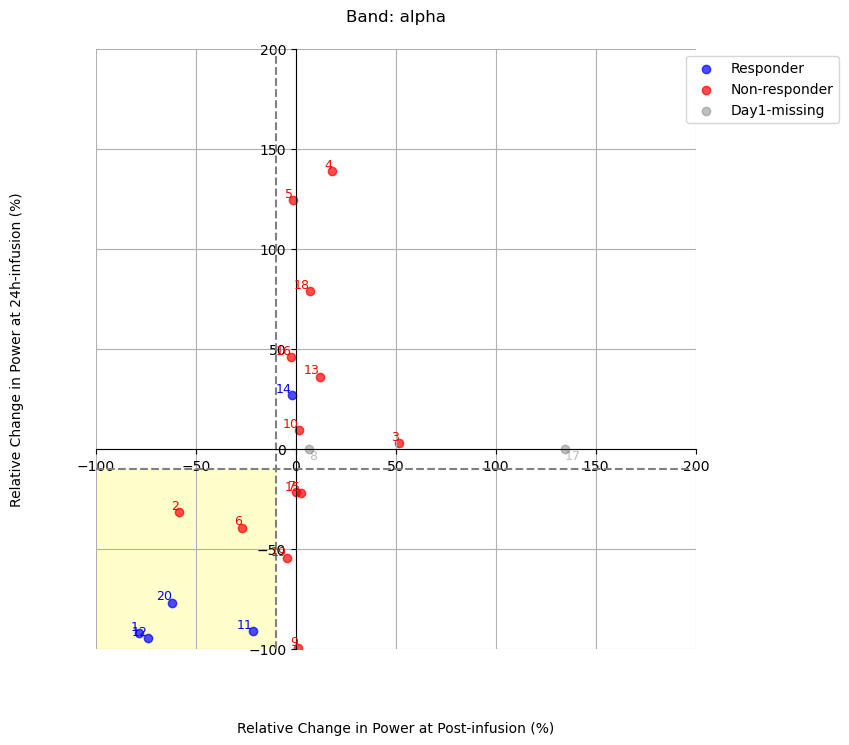

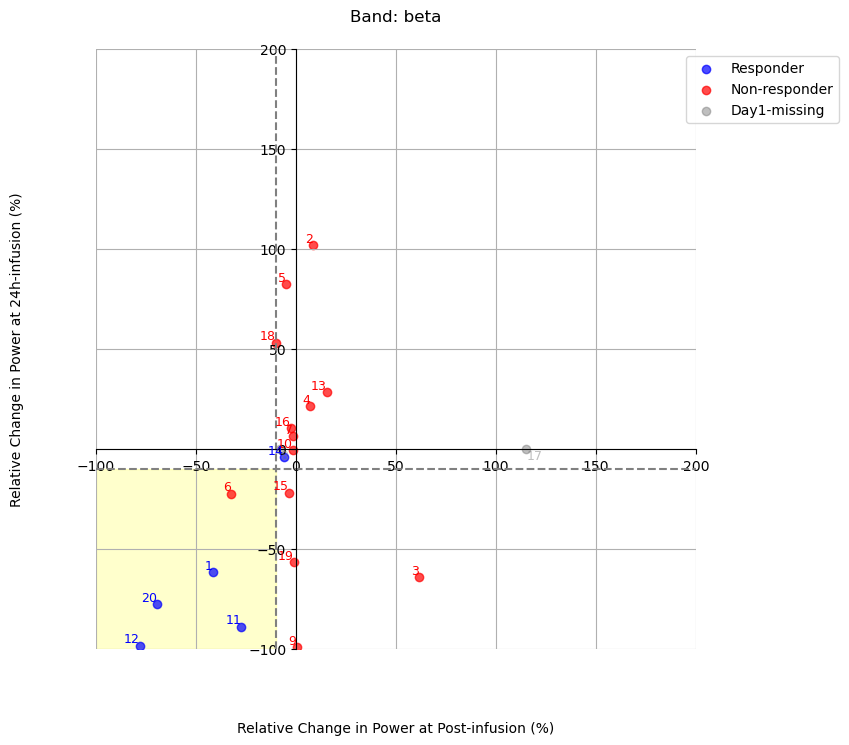

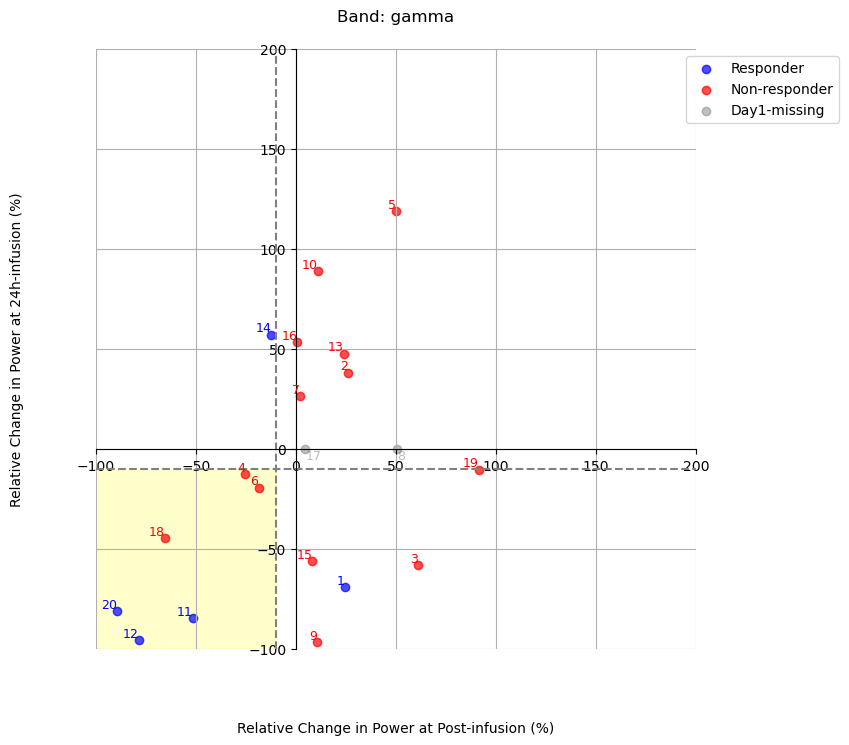

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.patches as patches
 
# 파일 경로 및 "pharmacoEEG" 시트 읽기 
file_path = r"D:\주성\documents\2025\Mg comma\차트리뷰\clinical features11.xlsx" 
pharmacoEEG_df = pd.read_excel(file_path, sheet_name="pharmacoEEG") 
clinical_df = pd.read_excel(file_path, sheet_name="clinical_data") 
clinical_df = clinical_df.rename(columns={"Patient No.": "ID"}) 
target_response = "response_10_and" # 타깃하는 response 기준 선택 
 
# band 컬럼의 고유값별로 데이터 분리 
bands = pharmacoEEG_df['band'].unique() 
 
# 각 band별로 산점도 그리기 
for band in bands: 
    # 현재 band에 해당하는 데이터 선택 
    df_band = pharmacoEEG_df[pharmacoEEG_df['band'] == band].copy() 
     
    # post_change와 day1_change에 100을 곱하여 % 단위 변환 
    df_band['post_change'] *= 100 
    df_band['day1_change'] *= 100 
     
    # response 정보를 ID 기준으로 매핑 
    df_band = df_band.merge(clinical_df[['ID', target_response]], on='ID', how='left') 
     
    # day1_change가 결측치가 아닌 데이터 (정상 값) 
    valid_df = df_band[df_band['day1_change'].notna()] 
    # day1_change가 결측치인 데이터: y값은 0으로 대체하고 투명도를 조절하여 표시 
    missing_df = df_band[df_band['day1_change'].isna()].copy() 
    missing_df['day1_change'] = 0  # 결측치 0으로 대체 
     
    # 그림 크기를 더 크게 설정하여 축 라벨이 겹치지 않도록 함
    fig, ax = plt.subplots(figsize=(10, 8)) 
    
    # 응답 영역을 노란색으로 표시 (-10% 이하 영역)
    # 1. 왼쪽 아래 사각형 (-100,-100)에서 (-10,-10)까지
    response_area = patches.Rectangle((-100, -100), 90, 90, alpha=0.2, color='yellow')
    ax.add_patch(response_area)
     
    # 범례를 위한 빈 플롯 생성
    responder_plot = ax.scatter([], [], color='blue', alpha=0.7, label='Responder')
    non_responder_plot = ax.scatter([], [], color='red', alpha=0.7, label='Non-responder')
    day1_missing_plot = ax.scatter([], [], color='gray', alpha=0.5, label='Day1-missing')
    
    # 유효한 day1_change 값을 가진 점들을 response 값에 따라 색상 구분하여 표시 
    for _, row in valid_df.iterrows(): 
        color = 'blue' if row[target_response] else 'red' 
        ax.scatter(row['post_change'], row['day1_change'], color=color, alpha=0.7) 
        ax.text(row['post_change'], row['day1_change'], str(row['ID']), fontsize=9, ha='right', va='bottom', color=color) 
     
    # NA인 day1_change 값은 회색으로 표시하고, 투명도를 50%로 설정 
    for _, row in missing_df.iterrows(): 
        color = 'gray'  # 회색으로 변경
        ax.scatter(row['post_change'], row['day1_change'], color=color, alpha=0.5) 
        ax.text(row['post_change'], row['day1_change'], str(row['ID']), fontsize=9, ha='left', va='top', color=color, alpha=0.5) 
     
    # x축과 y축을 원점(0,0) 기준으로 설정 
    ax.spines['left'].set_position('zero') 
    ax.spines['bottom'].set_position('zero') 
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none') 
     
    # 양쪽 축에 눈금 표시 
    ax.xaxis.set_ticks_position('bottom') 
    ax.yaxis.set_ticks_position('left') 
     
    # x축과 y축의 스케일을 -100에서 200으로 통일하고 눈금 간격 동일하게 설정
    ax.set_xlim(-100, 200) 
    ax.set_ylim(-100, 200)
    
    # 축 눈금 간격 설정 - 두 축 모두 동일한 간격으로
    major_ticks = np.arange(-100, 201, 50)  # -100부터 200까지 50 간격
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # 종횡비 1:1로 설정하여 x와 y 스케일이 시각적으로 동일하게 보이도록
    ax.set_aspect('equal')
     
    # x = -10, y = -10 위치에 회색 점선 추가 
    ax.axvline(x=-10, linestyle='--', color='grey') 
    ax.axhline(y=-10, linestyle='--', color='grey') 
     
    # 범례 위치 수정 - 그래프 외부 우측 상단에 위치
    ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
    
    ax.set_title(f'Band: {band}', pad=20) 
    
    # x축 라벨 위치 조정 - 그래프 아래쪽에 충분한 간격을 두고 배치
    ax.xaxis.set_label_coords(0.5, -0.12)  # x축 라벨을 아래로 이동
    ax.set_xlabel('Relative Change in Power at Post-infusion (%)')
    
    # y축 라벨 위치 조정 - 왼쪽으로 충분히 이동
    ax.yaxis.set_label_coords(-0.12, 0.5)  # y축 라벨을 왼쪽으로 이동
    ax.set_ylabel('Relative Change in Power at 24h-infusion (%)')
    
    ax.grid(True) 
    
    # 여백을 더 넓게 설정하여 라벨이 잘리지 않도록 함
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.85, top=0.9)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # For colormap

# Load data
file_path = r"D:\주성\documents\2025\Mg comma\차트리뷰\clinical features9.xlsx"
sheet_name_power = 'pharmacoEEG'
sheet_name_feature = 'clinical_data'

df = pd.read_excel(file_path, sheet_name=sheet_name_power)
response = pd.read_excel(file_path, sheet_name=sheet_name_feature)[['Patient No.', 'response_10']]
response.rename(columns={"Patient No.": "ID", "response_10": 'response'}, inplace=True)
df = df.merge(response, on='ID', how='left')

# Extract unique bands
bands = df["band"].unique()

# Set colormap (True = Blue scale, False = Red scale)
cmap_true = cm.get_cmap("Blues")  # Response=True group
cmap_false = cm.get_cmap("Reds")  # Response=False group

# Assign rankings separately for each band
df["rank_true"] = np.nan
df["rank_false"] = np.nan

for band in bands:
    band_data = df[df["band"] == band]

    # Rank within each band separately
    true_group = band_data[band_data["response"] == True]
    if not true_group.empty:
        df.loc[true_group.index, "rank_true"] = true_group["post_change"].abs().rank(method="min", pct=True)

    false_group = band_data[band_data["response"] == False]
    if not false_group.empty:
        df.loc[false_group.index, "rank_false"] = false_group["post_change"].abs().rank(method="min", pct=True)

# Plot change rate trends for each band
for band in bands:
    fig, ax = plt.subplots(figsize=(12, 6))  # Define Axes explicitly
    
    # Filter data for the current band
    band_data = df[df["band"] == band]

    # Plot individual patient change rates
    for _, row in band_data.iterrows():
        patient_id = row["ID"]
        pre_change = 0  # Pre-timepoint is always 0
        post_change = row["post_change"]
        day1_change = row["day1_change"]
        response_status = row["response"]

        # Assign colors based on rank within each band
        if response_status:
            norm_value = row["rank_true"] if not pd.isna(row["rank_true"]) else 0.5  # Default to mid-value
            color = cmap_true(norm_value)
        else:
            norm_value = row["rank_false"] if not pd.isna(row["rank_false"]) else 0.5  # Default to mid-value
            color = cmap_false(norm_value)

        # Adjust line thickness based on rank
        line_width = 1 + (norm_value * 4)  # Minimum width 1, max width 5
        marker_size = 6  # Keep marker size constant

        # Plot the change rate
        ax.plot(["pre", "post", "day1"], [pre_change, post_change, day1_change],
                 marker='o', linestyle='-', color=color, linewidth=line_width, markersize=marker_size, alpha=0.8)

    # Set plot title and labels
    ax.set_title(f"Change Rate Trend - {band} Band (Rank-based Coloring)", fontsize=14)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Change Rate", fontsize=12)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.grid(True)

    # ✅ Set colorbar with actual percentile rank
    sm_true = cm.ScalarMappable(cmap=cmap_true, norm=plt.Normalize(vmin=0, vmax=1))
    sm_false = cm.ScalarMappable(cmap=cmap_false, norm=plt.Normalize(vmin=0, vmax=1))

    # ✅ Adjust colorbar labels for correct rank representation
    cbar_true = plt.colorbar(sm_true, ax=ax, fraction=0.03, pad=0.02)
    cbar_true.set_label("Percentile Rank (Response: True)")

    cbar_false = plt.colorbar(sm_false, ax=ax, fraction=0.03, pad=0.06)
    cbar_false.set_label("Percentile Rank (Response: False)")

    plt.show()


In [ ]:
file_path = r"D:\주성\documents\2025\Mg comma\차트리뷰\clinical features9.xlsx"
sheet_name = 'pharmacoEEG'

df = pd.read_excel(file_path, sheet_name = sheet_name)

# 밴드별로 데이터 분리하기
bands = df['band'].unique()  # 모든 고유한 밴드 값 추출

# 그래프 스타일 설정
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

# 밴드 이름 첫 글자 대문자로 변경하는 함수
def capitalize_band(band_name):
    return band_name.capitalize()

# 큰 도표 생성 (3x2 그리드)
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 접근 용이하게 함

# 각 밴드별 그래프 생성 (첫 5개 서브플롯)
for i, band in enumerate(bands[:5]):  # 5개 밴드까지만 처리
    # 해당 밴드의 데이터만 필터링
    band_data = df[df['band'] == band].copy()
    
    # 각 환자 ID별 데이터 시각화
    for patient_id in band_data['ID'].unique():
        patient_data = band_data[band_data['ID'] == patient_id]
        
        # 시간 포인트를 x축으로 사용하기 위한 데이터 준비
        time_points = ['pre', 'post', 'day1']
        changes = [
            0,  # pre는 기준점이므로 변화율은 0
            patient_data['post_change'].values[0] if not patient_data['post_change'].isna().all() else np.nan,
            patient_data['day1_change'].values[0] if not patient_data['day1_change'].isna().all() else np.nan
        ]
        
        # 결측치가 있는 부분은 점선으로 표시
        valid_indices = ~np.isnan(changes)
        
        # 선 그래프로 표시 (결측치가 없는 부분)
        axes[i].plot(
            np.array(time_points)[valid_indices], 
            np.array(changes)[valid_indices], 
            marker='o', 
            label=f'ID: {patient_id}'
        )
        
        # 결측치가 있는 경우 점선으로 연결
        if not all(valid_indices):
            for j in range(len(time_points)-1):
                if valid_indices[j] and valid_indices[j+1]:
                    continue  # 두 지점 모두 유효하면 실선으로 이미 그려짐
                if valid_indices[j] or valid_indices[j+1]:  # 적어도 하나는 유효
                    axes[i].plot(
                        [time_points[j], time_points[j+1]], 
                        [changes[j], changes[j+1]], 
                        linestyle='--', 
                        alpha=0.5, 
                        color='gray'
                    )
    
    # 그래프 꾸미기
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)  # 0 기준선 추가
    axes[i].set_title(f'{capitalize_band(band)} Band Power Change Rate by Patient ID')
    axes[i].set_xlabel('Time Point')
    axes[i].set_ylabel('Relative Change in Power (%)')
    axes[i].set_xticks(range(len(time_points)))
    axes[i].set_xticklabels(time_points)
    
    # 환자 ID가 많은 경우 범례를 그래프 밖에 표시하지 않고 제외
    if len(band_data['ID'].unique()) <= 10:
        axes[i].legend(fontsize='small')

# 마지막 서브플롯(6번째)에 박스플롯 두 개 그리기
# Post 변화율에 대한 박스플롯
box_data = pd.melt(df, id_vars=['band'], value_vars=['post_change', 'day1_change'], 
                   var_name='time_point', value_name='change_rate')
box_data['time_point'] = box_data['time_point'].map({'post_change': 'Post', 'day1_change': 'Day 1'})

# 밴드 이름 첫 글자 대문자로 변경
box_data['band'] = box_data['band'].apply(capitalize_band)

sns.boxplot(x='band', y='change_rate', hue='time_point', data=box_data, ax=axes[5])
axes[5].set_title('Change Rate by Band and Time Point')
axes[5].set_xlabel('Band')
axes[5].set_ylabel('Relative Change in Power')
axes[5].axhline(y=0, color='red', linestyle='--')
axes[5].legend(title='Time Point')

# 전체 레이아웃 조정
plt.tight_layout()
plt.savefig('all_bands_change_rate.png', dpi=300)
plt.show()

# 이전 버전의 post의 relative power에 대한 오름차순 막대그래프

In [ ]:
df = pd.read_csv(r"E:\주성\documents\2025\Mg comma\data2.csv")

# CSV 파일 읽기
data = df

# 밴드별로 데이터 나누기
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

plt.figure(figsize=(15, 10))
for idx, band in enumerate(bands, 1):
    plt.subplot(2, 3, idx)
    
    # 해당 밴드의 데이터만 추출
    band_data = data[data['band'] == band].copy()
    
    # 변화율 계산 ((post - pre) / pre)
    change = (band_data['mean_post_infusion'] - band_data['mean_pre_infusion']) / band_data['mean_pre_infusion']
    
    # 오름차순 정렬
    sorted_change = np.sort(change)
    
    # 바 차트 그리기
    plt.bar(range(len(sorted_change)), sorted_change)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    plt.title(f'{band.capitalize()} Band')
    plt.ylim(-1, 2)  # y축 범위 수정

plt.suptitle('Power Change by Frequency Band', fontsize=14, y=1.02)    
plt.tight_layout()
plt.show()

# Table 3

In [7]:
import pandas as pd

# clinical feature
feature = pd.read_excel(r"D:\주성\documents\2025\Mg comma\차트리뷰\clinical features12.xlsx", sheet_name = 'clinical_data')

# target_response
target_response = input()
print(target_response)
feature.dropna(subset=target_response)

# 파생변수
feature['STESS_5'] = feature['STESS'] >= 5
feature['STESS_3'] = feature['STESS'] >= 3
feature['mRS_premorbid_4'] = feature['mRS_premorbid'] >= 4
feature['mRS_premorbid_3'] = feature['mRS_premorbid'] >= 3
feature['Age_65'] = feature['Age'] >=65
feature['mRS_discharge_4'] = feature['mRS_discharge'] >= 4
feature['mRS_discharge_3'] = feature['mRS_discharge'] >= 3
feature['mRS_3mo_4'] = feature['mRS_3mo'] >= 4
feature['mRS_3mo_3'] = feature['mRS_3mo'] >= 3

# Total subject
total_subject = feature[target_response].sum()
print("total response subject:", total_subject)

# 범주형
feature_cat = feature[['SRSE', 'CIVAD', 'Sex', 'ImmunoTx',
    'NORSE', 'Mg_protocol', 'STESS_5', 'STESS_3', 'mRS_premorbid_4', 'mRS_premorbid_3', 'Age_65', 'Etiology', 
    'Sz_type', 'mRS_discharge_4', 'mRS_discharge_3', 'Inhospital_mortality', 'mRS_3mo_4', 'mRS_3mo_3'
]]

for col in feature_cat.columns:
    cross = pd.crosstab(feature_cat[col], feature[target_response])
    print(cross)

# 연속형
feature_num = feature[['ASM_number', 'Age', 'STESS',  'mRS_premorbid', 'Max_Mg_conc', target_response, 'mRS_discharge', 'HOD', 'RSE_duration']]

feature_num_1 = feature_num.loc[feature_num[target_response]==1]
feature_num_0 = feature_num.loc[feature_num[target_response]==0]

for col in feature_num.columns:
    print(col)
    print('response')
    print(f"{feature_num_1[col].median()} ({feature_num_1[col].quantile(0.25)} - {feature_num_1[col].quantile(0.75)})")
    print('non-response')
    print(f"{feature_num_0[col].median()} ({feature_num_0[col].quantile(0.25)} - {feature_num_0[col].quantile(0.75)})")    

# 3mo는 따로 계산
feature2 = feature.copy().dropna(subset='mRS_3mo')
feature2_1 = feature2.loc[feature2[target_response]==1]
feature2_0 = feature2.loc[feature2[target_response]==0]
print('mRS_3mo')
print('response')
print(f"{feature2_1['mRS_3mo'].median()} ({feature2_1['mRS_3mo'].quantile(0.25)} - {feature2_1['mRS_3mo'].quantile(0.75)})")
print('non-response')
print(f"{feature2_0['mRS_3mo'].median()} ({feature2_0['mRS_3mo'].quantile(0.25)} - {feature2_0['mRS_3mo'].quantile(0.75)})")
cross_3mo_3 = pd.crosstab(feature2['mRS_3mo_3'], feature2[target_response])
print('mRS_3mo_3')
print(cross_3mo_3)
cross_3mo_4 = pd.crosstab(feature2['mRS_3mo_4'], feature2[target_response])
print('mRS_3mo_4')
print(cross_3mo_4)

response_10_and
total response subject: 5.0
response_10_and  0.0  1.0
SRSE                     
0                  4    2
1                  9    3
response_10_and  0.0  1.0
CIVAD                    
0                  4    2
1                  9    3
response_10_and  0.0  1.0
Sex                      
0                  6    2
1                  7    3
response_10_and  0.0  1.0
ImmunoTx                 
0                  4    4
1                  9    1
response_10_and  0.0  1.0
NORSE                    
0                  2    5
1                 11    0
response_10_and  0.0  1.0
Mg_protocol              
0                  3    2
1                 10    3
response_10_and  0.0  1.0
STESS_5                  
False              7    4
True               6    1
response_10_and  0.0  1.0
STESS_3                  
False              3    1
True              10    4
response_10_and  0.0  1.0
mRS_premorbid_4          
False             11    4
True               2    1
response_10_and  0.0

In [4]:
feature['response_10_and']

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     NaN
8     0.0
9     0.0
10    1.0
11    1.0
12    0.0
13    1.0
14    0.0
15    0.0
16    NaN
17    0.0
18    0.0
19    1.0
Name: response_10_and, dtype: float64

In [ ]:
# 통계값 구하기

import pandas as pd
import scipy.stats as stats

# clinical feature
feature = pd.read_excel(r"E:\주성\documents\2025\Mg comma\차트리뷰\clinical features10.xlsx", sheet_name = 'clinical_data')

# target_response
target_response = input()
print(target_response)

# 파생변수 
feature['STESS_5'] = feature['STESS'] >= 5
feature['STESS_3'] = feature['STESS'] >= 3
feature['mRS_premorbid_4'] = feature['mRS_premorbid'] >= 4
feature['mRS_premorbid_3'] = feature['mRS_premorbid'] >= 3
feature['Age_65'] = feature['Age'] >=65
feature['mRS_discharge_4'] = feature['mRS_discharge'] >= 4
feature['mRS_discharge_3'] = feature['mRS_discharge'] >= 3
feature['mRS_3mo_4'] = feature['mRS_3mo'] >= 4
feature['mRS_3mo_3'] = feature['mRS_3mo'] >= 3



results = {}
# 범주형
feature_cat = feature[['SRSE', 'CIVAD', 'Sex', 'ImmunoTx',
    'NORSE', 'Mg_protocol', 'STESS_5', 'STESS_3', 'mRS_premorbid_4', 'mRS_premorbid_3', 'Age_65', 
    'mRS_discharge_4', 'mRS_discharge_3', 'Inhospital_mortality', 'mRS_3mo_4', 'mRS_3mo_3'
]]

for col in feature_cat.columns:
    cross = pd.crosstab(feature_cat[col], feature[target_response])
    s, p = stats.fisher_exact(cross)
    results[col] = {'p-value': round(p, 3)}

# 다변수 범주형
feature_mulvar = feature[['Etiology', 'Sz_type']]

for col in feature_mulvar.columns:
    table = pd.crosstab(feature_mulvar[col], feature[target_response])
    s, p, d, e = stats.chi2_contingency(table)
    results[col] = {'p-value': round(p, 3)}

# 연속형 
feature_num = feature[['ASM_number', 'Age', 'STESS',  'mRS_premorbid', 'Max_Mg_conc', target_response, 'mRS_discharge', 'HOD', 'RSE_duration']]

for col in feature_num.columns:
    x = feature_num.loc[feature_num[target_response]== True][col]
    y = feature_num.loc[feature_num[target_response]== False][col]
    statistics, p_value = stats.mannwhitneyu(x, y)
    results[col] = {'p-value': round(p_value, 3)}

feature2 = feature.copy().dropna(subset='mRS_3mo')
feature2_1 = feature2.loc[feature2[target_response]==1]
feature2_0 = feature2.loc[feature2[target_response]==0]

s, p = stats.mannwhitneyu(feature2_1['mRS_3mo'], feature2_0['mRS_3mo'])
results['mRS_3mo'] = round(p, 3)

cross_4 = pd.crosstab(feature2['mRS_3mo_4'], feature2[target_response])
s, p = stats.fisher_exact(cross_4)
results['mRS_3mo_44'] = round(p, 3)

cross_3 = pd.crosstab(feature2['mRS_3mo_3'], feature2[target_response])
s, p = stats.fisher_exact(cross_3)
results['mRS_3mo_33'] = round(p, 3)

result_df = pd.DataFrame(results).T

Partial response?

In [9]:
import pandas as pd

# clinical feature
feature = pd.read_excel(r"E:\주성\documents\2025\Mg comma\차트리뷰\clinical features12.xlsx", sheet_name = 'clinical_data')

# target_response
target_response = "response_10_tri"
print(target_response)

# 파생변수
feature['STESS_5'] = feature['STESS'] >= 5
feature['STESS_3'] = feature['STESS'] >= 3
feature['mRS_premorbid_4'] = feature['mRS_premorbid'] >= 4
feature['mRS_premorbid_3'] = feature['mRS_premorbid'] >= 3
feature['Age_65'] = feature['Age'] >=65
feature['mRS_discharge_4'] = feature['mRS_discharge'] >= 4
feature['mRS_discharge_3'] = feature['mRS_discharge'] >= 3
feature['mRS_3mo_4'] = feature['mRS_3mo'] >= 4
feature['mRS_3mo_3'] = feature['mRS_3mo'] >= 3

# Total subject
for i in ['TRUE', 'PART', 'FALSE']:
    i_subject = feature.loc[feature[target_response] == i].shape[0]
    print(f"{i} : {i_subject}")

# 범주형
feature_cat = feature[['SRSE', 'CIVAD', 'Sex', 'ImmunoTx',
    'NORSE', 'Mg_protocol', 'STESS_5', 'STESS_3', 'mRS_premorbid_4', 'mRS_premorbid_3', 'Age_65', 'Etiology', 
    'Sz_type', 'Seizure_not_terminated', 'mRS_discharge_4', 'mRS_discharge_3', 'Inhospital_mortality', 'mRS_3mo_4', 'mRS_3mo_3'
]]

for col in feature_cat.columns:
    cross = pd.crosstab(feature_cat[col], feature[target_response])
    print(cross)

# 연속형
feature_num = feature[['ASM_number', 'Age', 'STESS',  'mRS_premorbid', 'Max_Mg_conc', target_response, 'mRS_discharge', 'HOD', 'RSE_duration', 'Day_until_Mg']]

feature_num_TRUE = feature_num.loc[feature_num[target_response]=='TRUE']
feature_num_PART = feature_num.loc[feature_num[target_response]=='PART']
feature_num_FALSE = feature_num.loc[feature_num[target_response]=='FALSE']

feature_cols = [col for col in feature_num.columns if col != target_response]

for col in feature_cols:
    print(col)
    print('response')
    print(f"{feature_num_TRUE[col].median()} ({feature_num_TRUE[col].quantile(0.25)} - {feature_num_TRUE[col].quantile(0.75)})")
    print('partial response')
    print(f"{feature_num_PART[col].median()} ({feature_num_PART[col].quantile(0.25)} - {feature_num_PART[col].quantile(0.75)})")
    print('non-response')
    print(f"{feature_num_FALSE[col].median()} ({feature_num_FALSE[col].quantile(0.25)} - {feature_num_FALSE[col].quantile(0.75)})")    

# 3mo는 따로 계산
feature2 = feature.copy().dropna(subset='mRS_3mo')
feature2_1 = feature2.loc[feature2[target_response]=='TRUE']
feature2_0 = feature2.loc[feature2[target_response]=='FALSE']
feature2_p = feature2.loc[feature2[target_response]=='PART']
print('mRS_3mo')
print('response')
print(f"{feature2_1['mRS_3mo'].median()} ({feature2_1['mRS_3mo'].quantile(0.25)} - {feature2_1['mRS_3mo'].quantile(0.75)})")
print('partial response')
print(f"{feature2_p['mRS_3mo'].median()} ({feature2_p['mRS_3mo'].quantile(0.25)} - {feature2_p['mRS_3mo'].quantile(0.75)})")
print('non-response')
print(f"{feature2_0['mRS_3mo'].median()} ({feature2_0['mRS_3mo'].quantile(0.25)} - {feature2_0['mRS_3mo'].quantile(0.75)})")
cross_3mo_3 = pd.crosstab(feature2['mRS_3mo_3'], feature2[target_response])
print('mRS_3mo_3')
print(cross_3mo_3)
cross_3mo_4 = pd.crosstab(feature2['mRS_3mo_4'], feature2[target_response])
print('mRS_3mo_4')
print(cross_3mo_4)

response_10_tri
TRUE : 5
PART : 4
FALSE : 9
response_10_tri  FALSE  PART  TRUE
SRSE                              
0                    2     2     2
1                    7     2     3
response_10_tri  FALSE  PART  TRUE
CIVAD                             
0                    2     2     2
1                    7     2     3
response_10_tri  FALSE  PART  TRUE
Sex                               
0                    6     0     2
1                    3     4     3
response_10_tri  FALSE  PART  TRUE
ImmunoTx                          
0                    3     1     4
1                    6     3     1
response_10_tri  FALSE  PART  TRUE
NORSE                             
0                    2     0     5
1                    7     4     0
response_10_tri  FALSE  PART  TRUE
Mg_protocol                       
0                    2     1     2
1                    7     3     3
response_10_tri  FALSE  PART  TRUE
STESS_5                           
False                5     2     4
True       

# 타임 포인트에 대한 RM ANOVA (개인 수준의 분석) at Results

정규성 검정을 일단 하고, ANOVA 및 partial eta-squared와 omega squared를 구해보자

In [ ]:
name_list = [
    고정실,김가람,김득실,김영현,김충연,민병춘1,박주연1,
    벌,안중훈,윤병시,이미우,임석봉,전창희,
    정금례,정용태,이귀임,정복연,김정한,정광훈1,조진욱]



In [ ]:
# 부분 에타 제곱 계산 함수
def partial_eta_squared(f_value, df_effect, df_error):
    """
    계산된 F 값과 자유도로부터 부분 에타 제곱 계산
    
    Parameters:
    -----------
    f_value : float
        F-통계량 값
    df_effect : int
        효과(처리)의 자유도
    df_error : int
        오차의 자유도
        
    Returns:
    --------
    float
        부분 에타 제곱 값 (0~1 사이)
    """
    return (f_value * df_effect) / (f_value * df_effect + df_error)

# Define Cohens'D
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std



In [ ]:
# Removing large artifact by band 함수 정의
def remove_artifacts(before_mean, after_mean, large_artifact):
    before_idx = set()
    after_idx = set()

    for t_start, t_end in large_artifact:
        if t_start < 3600 and t_end < 3600:
            before_idx.update(range(t_start*200, t_end*200))
            after_idx.update(range(t_start*200, t_end*200))
        elif t_start < 3600 and t_end >= 3600:
            before_idx.update(range(t_start*200, 3600*200))
            after_idx.update(range(t_start*200, 3600*200))
            after_idx.update(range(0, (t_end-3600)*200))
            before_idx.update(range(0, (t_end-3600)*200))
        else:
            after_idx.update(range((t_start-3600)*200, (t_end-3600)*200))
            before_idx.update(range((t_start-3600)*200, (t_end-3600)*200))

    before_idx = sorted(before_idx)
    after_idx = sorted(after_idx)

    return np.delete(before_mean, before_idx), np.delete(after_mean, after_idx)

# Process band data 함수 정의
def process_band_data(tfr_data, tfr_data_day1, large_artifact):
    start1, end1 = 0, 3599 * 200
    start2, end2 = 3600 * 200, 7199 * 200

    # Split before and after
    before = tfr_data[:, :, start1:end1]
    after = tfr_data[:, :, start2:end2]
    day1 = tfr_data_day1

    # Average over channels and frequencies
    before_mean_channel = before.mean(axis=0)
    after_mean_channel = after.mean(axis=0)
    day1_mean_channel = day1.mean(axis=0)
    
    before_mean = before_mean_channel.mean(axis=0)
    after_mean = after_mean_channel.mean(axis=0)
    day1_mean = day1_mean_channel.mean(axis=0)

    before_clean, after_clean = remove_artifacts(before_mean, after_mean, large_artifact)
    day1_clean = day1_mean.copy()
    # Remove artifacts
    return before_clean, after_clean, day1_clean

# Main 함수 정의
def main():
    # Initialize name dictionary
    names = ['고정실', '김가람', '김득실', '김영현', '김충연', '민병춘1', '박주연1', '박주연2', '벌', 
             '안중훈', '윤병시', '이미우', '임석봉', '전창희', '정광훈2', '정금례', '정용태', '이귀임', 
             '정복연', '김정한', '정광훈1', '조진욱']
    name_dict = {name: i+1 for i, name in enumerate(names)}

    # Get analysis targets
    name_list = input("분석대상 이름을 입력하세요. (여러명일 경우 쉼표로 구분)").split(',')
    print(f'분석대상은 {name_list}입니다.')

    ## Load workbook and artifact data
    #wb = op.load_workbook(r"C:\Users\esin4\OneDrive\바탕 화면\Github\Mg_infusion_coma\Mg_infusion_data.xlsx")
    large_artifact_data = pd.read_csv(r"C:\Users\Brain_Science\Documents\GitHub\Mg_infusion_coma\large_artifact.csv", encoding='utf-8-sig')

    # Process each name
    for name in name_list:
        print(f'{name}의 데이터를 분석합니다.')
        
        # Get large artifacts
        large_artifact = []
        if name in large_artifact_data['Name'].values:
            coordinates = large_artifact_data[large_artifact_data['Name'] == name]['Coordinates'].values[0]
            if coordinates != 'skip':
                large_artifact = eval(coordinates)
        print(f"{name}의 large artifact: {large_artifact}")

        ## Get row number
        #row = name_dict.get(name)
        #if row is None:
        #    print(f"{name}이(가) name_dict에 없습니다.")
        #    exit()

        # Store band data in dictionary
        tfr_data = {}
        tfr_data_day1 = {}
        
        # Load band data
        for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma1', 'Gamma2']:
            file_path = rf'E:\Mg_EEG\tfr_files_gamma\{name}{band}_7200_tfr.h5'
            file_path_day1 = rf"E:\Mg_EEG\tfr_files_subacute\{name}_day1_{band}_tfr.h5"
            tfr = mne.time_frequency.read_tfrs(file_path)
            tfr_day1 = mne.time_frequency.read_tfrs(file_path_day1)
            tfr_data[band] = tfr.data
            tfr_data_day1[band] = tfr_day1.data
            del tfr, tfr_day1
        print(f"{name}의 데이터를 불러왔습니다.")

        # Combine Gamma bands
        if 'Gamma1' in tfr_data and 'Gamma2' in tfr_data:
            tfr_data['Gamma'] = np.concatenate([tfr_data['Gamma1'], tfr_data['Gamma2']], axis=1)
            del tfr_data['Gamma1'], tfr_data['Gamma2']
        if 'Gamma1' in tfr_data_day1 and 'Gamma2' in tfr_data_day1:
            tfr_data_day1['Gamma'] = np.concatenate([tfr_data_day1['Gamma1'], tfr_data_day1['Gamma2']], axis=1)
        print(f"{name}의 Gamma1과 Gamma2 데이터를 결합했습니다.")

        # Process each band
        for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']:
            if band not in tfr_data:
                print(f"Warning: {band} data not found")
                exit()
                
            before_clean, after_clean, day1_clean = process_band_data(tfr_data[band], tfr_data_day1[band], large_artifact)
            print(f"{band} 데이터의 artifact를 제거했습니다.")
            
            #run_tests(before_clean, after_clean, band, wb, row, name)
            #print(f"{band} 데이터의 테스트를 실행했습니다.")
            
            del tfr_data[band]
            print(f"{band} 데이터를 삭제했습니다.")
        return before_clean, after_clean, day1_clean
    ## Save results
    #wb.save(r"C:\Users\esin4\OneDrive\바탕 화면\Github\Mg_infusion_coma\Mg_infusion_data.xlsx")
    #print(f"{name_list}의 데이터 분석결과를 저장했습니다.")
    #print(f"{name_list}의 데이터 분석이 완료되었습니다.")

In [ ]:
before_clean, after_clean, day1_clean = main()

In [ ]:
day1_clean.shape

In [ ]:
for group in [before_clean, after_clean, day1_clean]:
    stat, p = stats.shapiro(group)
    print(f"Shapiro-Wilk Test p-value: {p:.4f}")

In [ ]:
stat, p = stats.levene(before_clean, after_clean, day1_clean)
print(f"Levene Test p-value: {p:.4f}")


In [ ]:
from scipy import stats

# ANOVA 수행
f_stat, p_value = stats.f_oneway(before_clean, after_clean, day1_clean)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 결과 해석
alpha = 0.05  # 유의수준 설정
if p_value < alpha:
    print("유의한 차이가 있음 (귀무가설 기각)")
else:
    print("그룹 간 평균 차이가 없음 (귀무가설 채택)")


In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 준비 (NumPy 배열을 Pandas DataFrame 형태로 변환)
data = pd.DataFrame({
    'score': np.concatenate([before_clean, after_clean, day1_clean]),
    'group': (['before_clean'] * len(before_clean)) +
             (['after_clean'] * len(after_clean)) +
             (['day1_clean'] * len(day1_clean))
})

# Tukey's HSD 사후검정 수행
tukey_result = pairwise_tukeyhsd(data['score'], data['group'], alpha=0.05)
print(tukey_result)

# Table 2

In [ ]:
df = pd.read_excel(r"E:\주성\documents\2025\Mg comma\merged_power_data.xlsx")

# 변화율 계산
df['post_change'] = (df['post'] - df['pre']) / df['pre']*100
df['day1_change'] = (df['day1'] - df['pre']) / df['pre']*100

# relative change 중앙값 및 Q1, Q3
print('total')
print(df[['post_change', 'day1_change']].describe())
for band in df['band'].unique():
    print(band)
    print(df.loc[df['band']==band][['post_change', 'day1_change']].describe().round(2))

# 감소한 수 및 비율
print('total')
post = print((df['post_change'] < 0).sum())
print(post)
print(post/100)
day1 = print((df['day1_change'] < 0).sum())
print(day1)
print(day1/100)

for band in df['band'].unique():
    print(band)
     = print((df['post_change'] < 0).sum())

# Supplementary Table 2

In [ ]:
df = pd.read_excel(r"D:\주성\documents\2025\Mg comma\clinical features6.xlsx", sheet_name='Sheet1')
df = df.iloc[:-2, :]

df1 = df[['Mg type', 'mRS_Discharge', 'mRS_3mo_text', 'Inhospital_Mortality', 'SE_Duration', 'Hospital_days']]
df1['mRS_Discharge_4'] = df1['mRS_Discharge'] >=4
df1['mRS_Discharge_5'] = df1['mRS_Discharge'] >=5

for col in ['mRS_Discharge', 'SE_Duration', 'Hospital_days']:
    x = df1.loc[df1['Mg type']==1][col]
    y = df1.loc[df1['Mg type']==2][col]
    s, p = stats.mannwhitneyu(x, y)
    print(col, p, x.median(), x.quantile(0.25), x.quantile(0.75), y.median(), y.quantile(0.25), y.quantile(0.75))

for col in ['mRS_Discharge_4', 'Inhospital_Mortality', 'mRS_Discharge_5']:
    cross = pd.crosstab(df1['Mg type'], df1[col])
    s, p = stats.fisher_exact(cross)
    print(col, cross, p)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# 결과를 저장할 빈 리스트 생성
results = []

# 1부터 20까지 각 임곗값에 대해 반복
for time in range(1, 21):
    # 각 임곗값별로 새로운 불린 변수 생성
    col_time = f'time_{time}'
    df2[col_time] = df2['time_until_Mg'] >= time
    
    # 각 임곗값에 대한 결과를 저장할 딕셔너리 생성
    res = {'threshold': time}
    
    # 연속형 변수 (Mann-Whitney U 검정)
    for col in ['mRS_Discharge', 'SE_Duration', 'Hospital_days']:
        group_true = df2.loc[df2[col_time] == True, col]
        group_false = df2.loc[df2[col_time] == False, col]
        
        # 두 그룹간의 차이를 검정
        try:
            s, p_val = stats.mannwhitneyu(group_true, group_false)
        except Exception as e:
            p_val = np.nan
        
        # 결과 저장 (p-value, 그룹별 중앙값 등)
        res[f'p_{col}'] = p_val
        res[f'{col}_median_true'] = group_true.median()
        res[f'{col}_median_false'] = group_false.median()
        # 추가로 사분위수 등 다른 통계치를 저장할 수도 있음
        res[f'{col}_Q1_true'] = group_true.quantile(0.25)
        res[f'{col}_Q3_true'] = group_true.quantile(0.75)
        res[f'{col}_Q1_false'] = group_false.quantile(0.25)
        res[f'{col}_Q3_false'] = group_false.quantile(0.75)
    
    # 범주형 변수 (Fisher의 정확 검정)
    for col in ['mRS_Discharge_4', 'Inhospital_Mortality', 'mRS_Discharge_5']:
        cross = pd.crosstab(df2[col_time], df2[col])
        try:
            # Fisher 검정은 2x2 교차표에 적합하므로, 그렇지 않을 경우 오류가 날 수 있음
            s, p_cat = stats.fisher_exact(cross)
        except Exception as e:
            p_cat = np.nan
        res[f'p_{col}'] = p_cat
        
    # 결과 리스트에 추가
    results.append(res)

# 결과를 DataFrame으로 변환하여 확인
result_df = pd.DataFrame(results)
print(result_df)


In [ ]:
result_df.to_csv(r"D:\주성\documents\2025\Mg comma\result_df.csv")

In [ ]:
result_df.loc[result_df['threshold']==11].T